In [1]:
import ROOT as r 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.24/02


In [2]:
directory= "/Users/adit/Google Drive/Internship_ Research/Muon g-2/Data Filed/combined_forAdit_timealigned.root"
f = r.TFile(directory)

In [3]:
f.cd('LaserEvents')
t = f.Get('LaserEvents/tree')
df = pd.DataFrame(r.RDataFrame(t).AsNumpy())
c= r.TCanvas()

In [6]:
import random
random.seed(100)

#runs = pd.unique(df['runNum'])
#subRuns = pd.unique(df[df['runNum'] == run]['subRunNum'])
#fillNums = pd.unique(df[(df['runNum'] == run) & (df['subRunNum']==subRun)]['fillNum'])
#calos = pd.unique(df['caloNum'])
#xtals = pd.unique(df['xtalNum'])

#run = random.choice(runs)
#subRun = random.choice(subRuns)
#fill = random.choice(fillNums)
#calo = random.choice(calos)
#xtal = random.choice(xtals)

run = 25032
subRun = 173
fill = 12
calo = 2
xtal =10

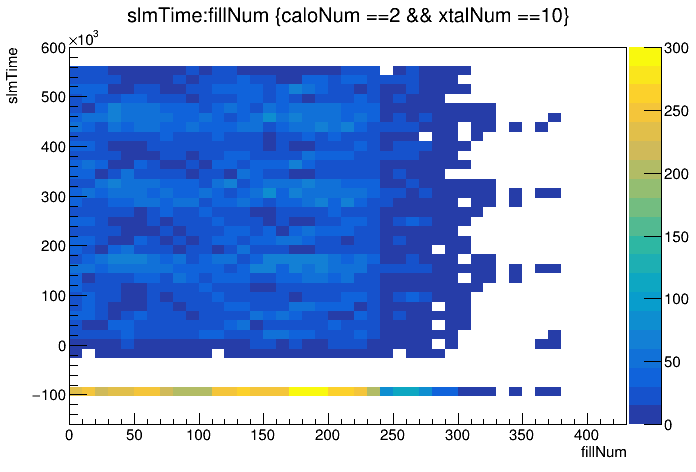

In [7]:
t.Draw('slmTime:fillNum', "caloNum =={} && xtalNum =={}".format(calo,xtal), 'colz')
c.Draw()
c.SetLogy(0)

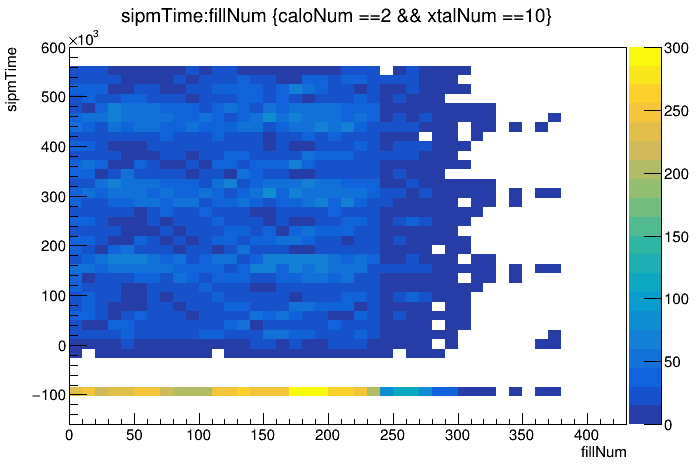

In [8]:
t.Draw('sipmTime:fillNum', "caloNum =={} && xtalNum =={}".format(calo,xtal), 'colz')
c.Draw()
c.SetLogy(0)


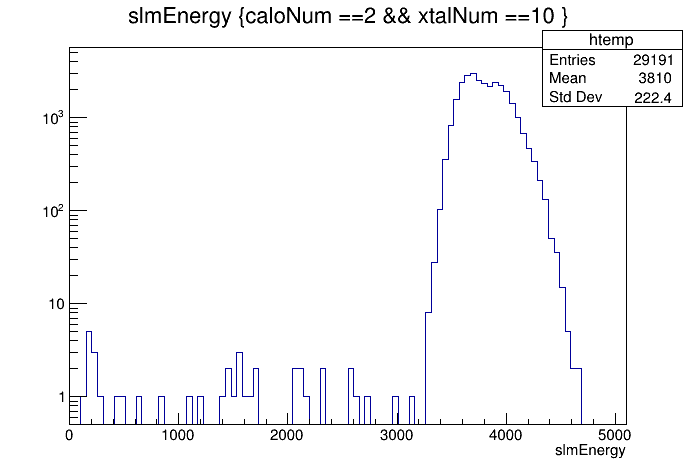

In [19]:
t.Draw("slmEnergy", "caloNum =={} && xtalNum =={} ".format(calo,xtal))
c.Draw()
c.SetLogy()

In [21]:
# these are the outliers after energy cuts
mincut = 3200
maxcut = 5000
#these vary by calo, should I change them up for every one or just take a minimum threshold?

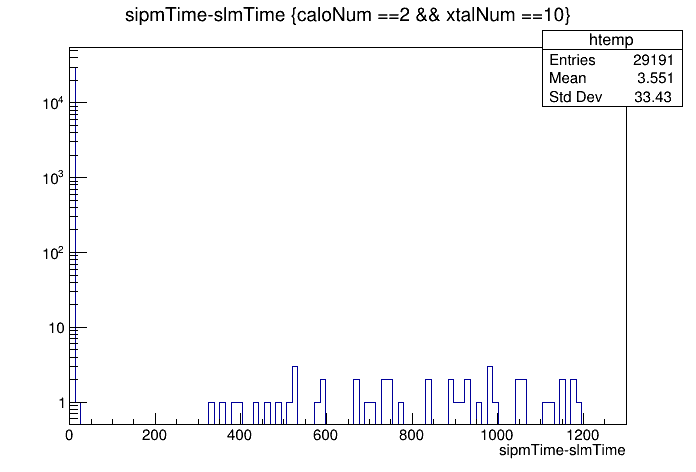

In [22]:
#time differences of the main pulses after the energy cuts
t.Draw('sipmTime-slmTime', "caloNum =={} && xtalNum =={}".format(calo,xtal))
c.SetLogy()
c.Draw()

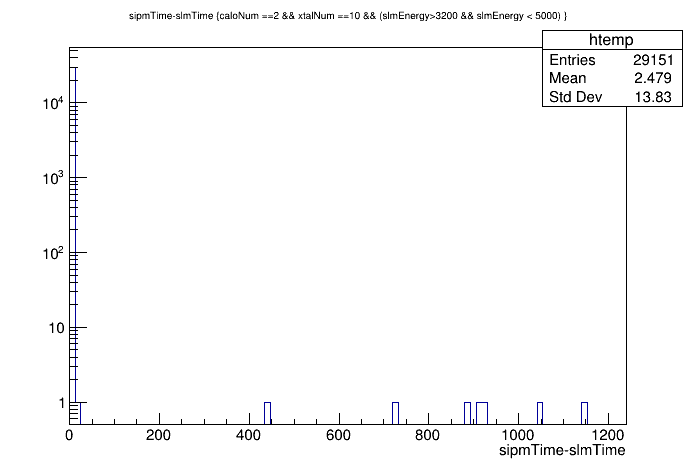

In [23]:
t.Draw('sipmTime-slmTime', "caloNum =={} && xtalNum =={} && (slmEnergy>{} && slmEnergy < {}) ".format(calo,xtal,mincut,maxcut))
c.SetLogy()
c.Draw()

#still a lot of laser with large time difference

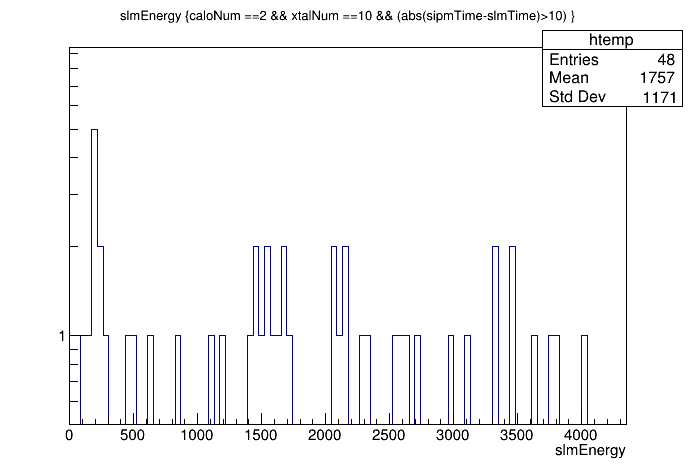

In [15]:
#looking at the energies of the pulses with large tie differences
t.Draw("slmEnergy", "caloNum =={} && xtalNum =={} && (abs(sipmTime-slmTime)>10) ".format(calo,xtal))
c.Draw()

# noise hard to distinguish from real data only based on energy as it has a uniform spectra
#despite removing some from extremal energies a lot are mixed with laser pulses
#separate time cut also necessary

In [16]:
df_single = df[(df['runNum']==run) & (df['subRunNum']==subRun) & (df['fillNum']==fill)]
df_laser = df_single[df_single['slmTime']>-90000]
df_sync = df_single[df_single['slmTime']<-90000]
df_laser[df_laser['sipmTime']-df_laser['slmTime']<10]

,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtAmp1,lmPmtAmp2,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy,slmPedestal,slmChi2
29221838,1.556034e+09,9.665657e+10,25032,173,12,15,1,1,0,5887.096902,...,1212.32,611.32,26969.0,12948.0,110632.0,110819.0,5885.095073,3687.419765,-1802.351681,149.700449
29221839,1.556034e+09,9.665657e+10,25032,173,12,15,1,1,1,5887.061343,...,1212.32,611.32,26969.0,12948.0,110632.0,110819.0,5885.095073,3687.419765,-1802.351681,149.700449
29221840,1.556034e+09,9.665657e+10,25032,173,12,15,1,1,2,5887.053920,...,1212.32,611.32,26969.0,12948.0,110632.0,110819.0,5885.095073,3687.419765,-1802.351681,149.700449
29221841,1.556034e+09,9.665657e+10,25032,173,12,15,1,1,3,5887.347429,...,1212.32,611.32,26969.0,12948.0,110632.0,110819.0,5885.095073,3687.419765,-1802.351681,149.700449
29221842,1.556034e+09,9.665657e+10,25032,173,12,15,1,1,4,5887.201105,...,1212.32,611.32,26969.0,12948.0,110632.0,110819.0,5885.095073,3687.419765,-1802.351681,149.700449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29228249,1.556034e+09,9.665657e+10,25032,173,12,15,1,24,49,449881.042674,...,951.54,574.54,21746.0,12647.0,554625.0,554814.0,449881.064786,2236.232840,-1782.031744,12.440077
29228250,1.556034e+09,9.665657e+10,25032,173,12,15,1,24,50,449880.923611,...,951.54,574.54,21746.0,12647.0,554625.0,554814.0,449881.064786,2236.232840,-1782.031744,12.440077
29228251,1.556034e+09,9.665657e+10,25032,173,12,15,1,24,51,449881.386945,...,951.54,574.54,21746.0,12647.0,554625.0,554814.0,449881.064786,2236.232840,-1782.031744,12.440077
29228252,1.556034e+09,9.665657e+10,25032,173,12,15,1,24,52,449881.366736,...,951.54,574.54,21746.0,12647.0,554625.0,554814.0,449881.064786,2236.232840,-1782.031744,12.440077


In [17]:
allNoise = df[(df['sipmTime']- df['slmTime']) > 10]
#tells us that all sync pulse are fired at the same time  tho they have different energies depending on the laser head they were fired from 

In [24]:
allNoise[allNoise['slmEnergy']< 1000].nunique()
# not really that much noise after energy cut, only 33k entries out of 33M entires only 0.1% of all are noises, is that fair?

gpsTimeStamp      152
cccTimeStamp      152
runNum             11
subRunNum         108
fillNum           110
bunchNum           16
fillType            1
caloNum            24
xtalNum            54
sipmTime        33222
sipmEnergy      33222
sipmPedestal    33222
sipmChi2        33222
smPin1Amp         152
smPin1Time        108
smPin2Amp         152
smPin2Time        112
smPmtAmp            1
smPmtTime           1
lmPmtAmp1         604
lmPmtAmp2         599
lmPmtArea1        598
lmPmtArea2        558
lmPmtTime1        356
lmPmtTime2        396
slmTime           154
slmEnergy         154
slmPedestal       154
slmChi2           154
dtype: int64